In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset
df =pd.read_csv("Social_Network_Ads.csv")

# data preprocessing steps

In [4]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
50,15694395,Female,24,32000,0
8,15600575,Male,25,33000,0
44,15715541,Female,28,84000,0
189,15715160,Male,28,32000,0
224,15575002,Female,35,60000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [7]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [89]:
df.duplicated().unique()

array([False])

In [9]:
# if duplicates are present.
#df.drop_duplicates()

In [91]:
df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [11]:
df['Age'].unique()

array([19, 35, 26, 27, 32, 25, 20, 18, 29, 47, 45, 46, 48, 49, 31, 21, 28,
       33, 30, 23, 24, 22, 59, 34, 39, 38, 37, 42, 40, 36, 41, 58, 55, 52,
       60, 56, 53, 50, 51, 57, 44, 43, 54], dtype=int64)

In [12]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [13]:
parth =df.copy()

In [14]:
np.round(parth.describe() , 1)

,User ID,Age,EstimatedSalary,Purchased
count,400.0,400.0,400.0,400.0
mean,15691539.8,37.7,69742.5,0.4
std,71658.3,10.5,34097.0,0.5
min,15566689.0,18.0,15000.0,0.0
25%,15626763.8,29.8,43000.0,0.0
50%,15694341.5,37.0,70000.0,0.0
75%,15750363.0,46.0,88000.0,1.0
max,15815236.0,60.0,150000.0,1.0


In [15]:
## Handling Outliers 

<Axes: >

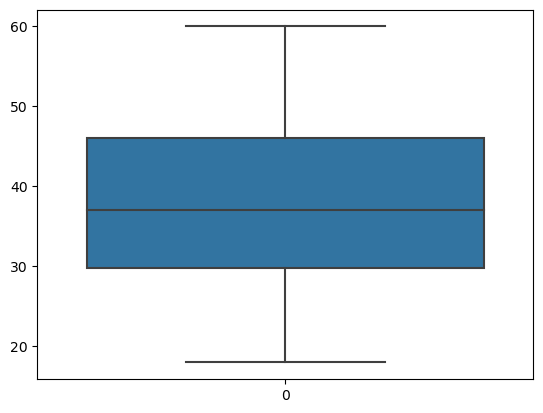

In [16]:
sns.boxplot(df['Age'])

<Axes: >

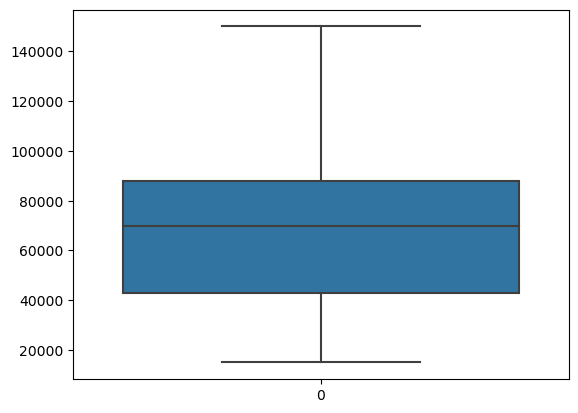

In [17]:
sns.boxplot(df['EstimatedSalary'])

<Axes: >

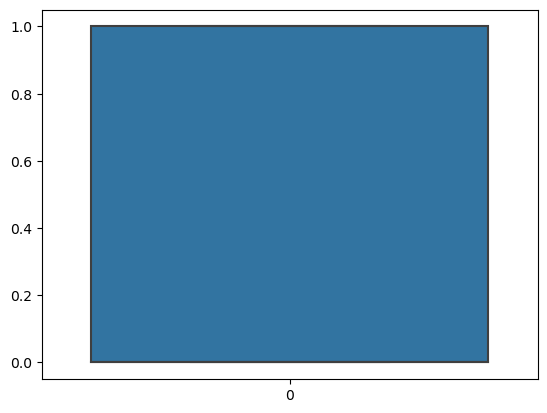

In [18]:
sns.boxplot(df['Purchased'])

<Axes: >

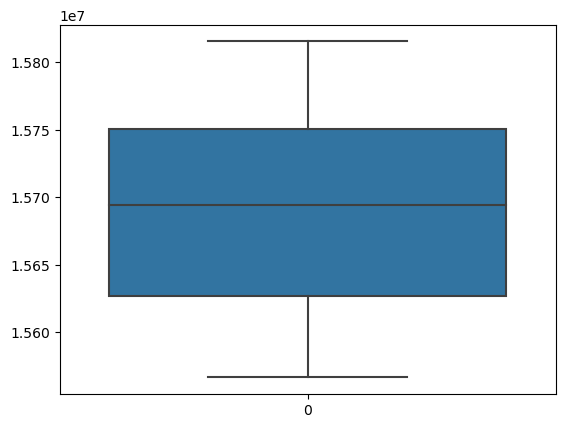

In [19]:
sns.boxplot(df['User ID'])

# Insights : IN our dataset Outliers are not presents.

## EDA 

C:\Users\solan\anaconda1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


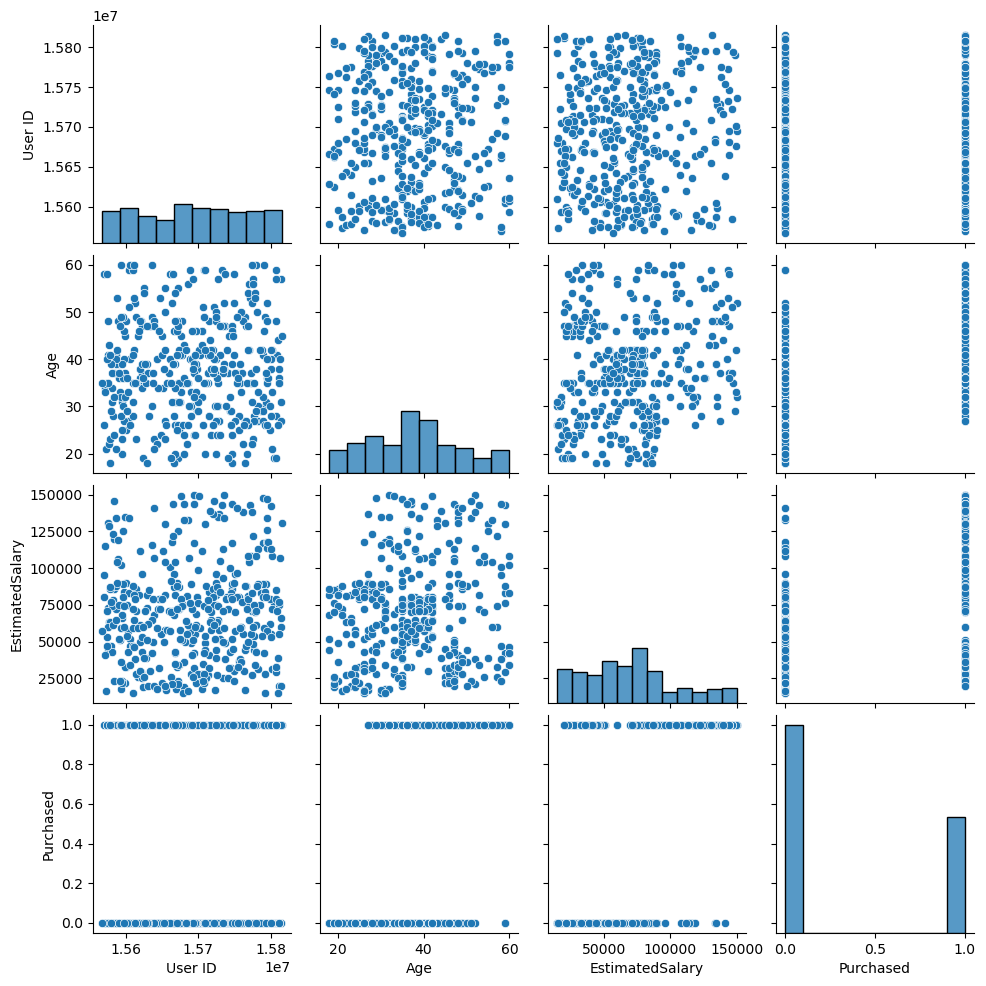

In [22]:
sns.pairplot(df)

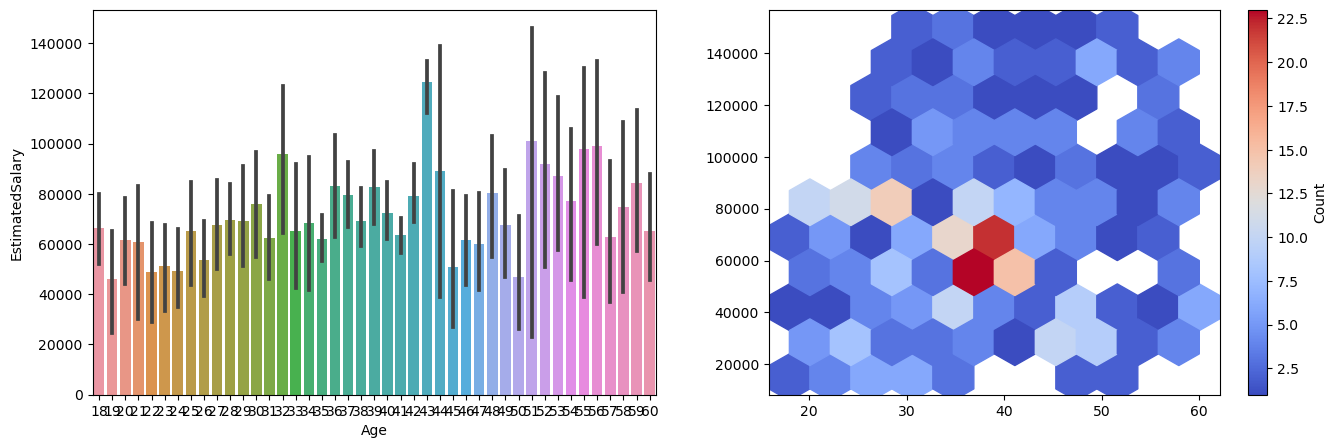

In [23]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.barplot(x='Age' , y='EstimatedSalary', data= df)
plt.subplot(1,2,2)
plt.hexbin(df['Age'], df['EstimatedSalary'], gridsize=10, cmap='coolwarm', mincnt=1)
plt.colorbar(label='Count')
plt.show()

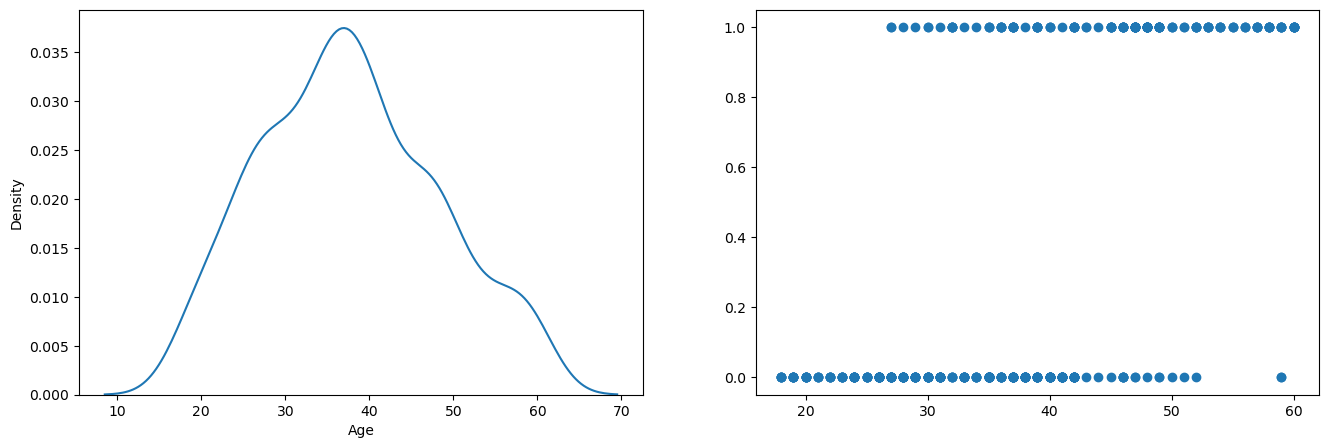

In [24]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(df['Age'])
plt.subplot(1,2,2)
plt.scatter(df['Age'] ,df['Purchased'])
plt.show()

In [38]:
# WE removing gender because purchased does  not get affected by male or female 

In [41]:
df1 = df.drop(columns=['Gender'])

<Axes: >

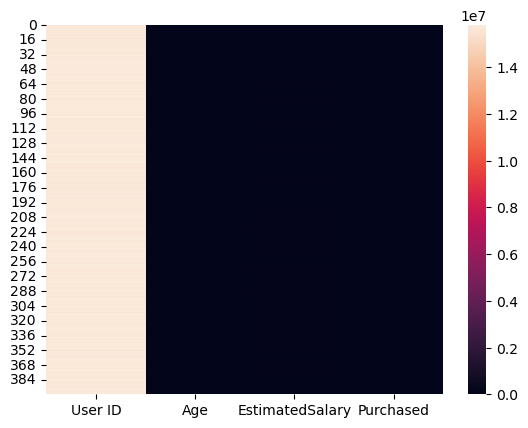

In [42]:
sns.heatmap(df1)

## Insights we need to perform Standardization on dataset to make it on same scale .

In [11]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train , Y_test =train_test_split(df.drop(columns=['Gender' ,'Purchased']) , df['Purchased'] , test_size=0.20 , random_state=20) 

In [12]:
X_train.head()

,User ID,Age,EstimatedSalary
94,15786993,29,83000
91,15636428,30,116000
89,15682268,35,50000
329,15639576,47,107000
129,15792102,26,84000


## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
SD =StandardScaler()


In [15]:
SD.fit(X_train)


StandardScaler()

In [16]:
X_train_scaled = SD.transform(X_train)
X_test_scaled = SD.transform(X_test)

In [17]:

X_train_scaled

array([[ 1.37611483, -0.80276277,  0.44295604],
       [-0.76043492, -0.70800656,  1.43671337],
       [-0.10995545, -0.23422551, -0.5508013 ],
       [-0.71576412,  0.90284902,  1.16568865],
       [ 1.44861264, -1.0870314 ,  0.4730699 ],
       [ 0.3567891 , -0.89751898, -1.09285075],
       [ 0.76999398, -0.51849414,  0.95489164],
       [-1.11855338,  1.47138628,  0.41284218],
       [-0.07401164, -1.46605624,  0.38272832],
       [-0.9295539 , -1.75032487, -1.48433091],
       [ 1.57838216, -0.42373793, -1.12296461],
       [-0.30502834,  0.99760523, -1.00250917],
       [ 0.32818163, -0.23422551, -1.24342004],
       [-1.38278938,  0.90284902, -1.36387548],
       [-1.59643726,  0.52382418,  1.82819354],
       [-0.13869064, -1.65556866, -0.97239532],
       [-1.35168443,  0.14479933,  0.20204517],
       [ 0.62362191,  0.05004312, -0.5508013 ],
       [-1.5441605 , -0.61325035,  0.17193131],
       [-0.31608252, -0.32898172, -0.76159831],
       [ 1.50890687, -0.1394693 ,  1.496

In [18]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns =X_test.columns)

In [19]:
X_train_scaled

,User ID,Age,EstimatedSalary
0,1.376115,-0.802763,0.442956
1,-0.760435,-0.708007,1.436713
2,-0.109955,-0.234226,-0.550801
3,-0.715764,0.902849,1.165689
4,1.448613,-1.087031,0.473070
...,...,...,...
315,-0.768027,2.134680,-0.791712
316,-0.331223,0.808093,0.834436
317,-1.366542,2.134680,1.015119
318,-0.026176,2.039924,0.232159


In [20]:
np.round(X_train_scaled.describe(),1)

,User ID,Age,EstimatedSalary
count,320.0,320.0,320.0
mean,-0.0,0.0,0.0
std,1.0,1.0,1.0
min,-1.8,-1.8,-1.6
25%,-0.9,-0.8,-0.8
50%,0.0,-0.0,-0.1
75%,0.8,0.8,0.5
max,1.8,2.1,2.4


<Axes: title={'center': 'After scaling'}, xlabel='Age', ylabel='Density'>

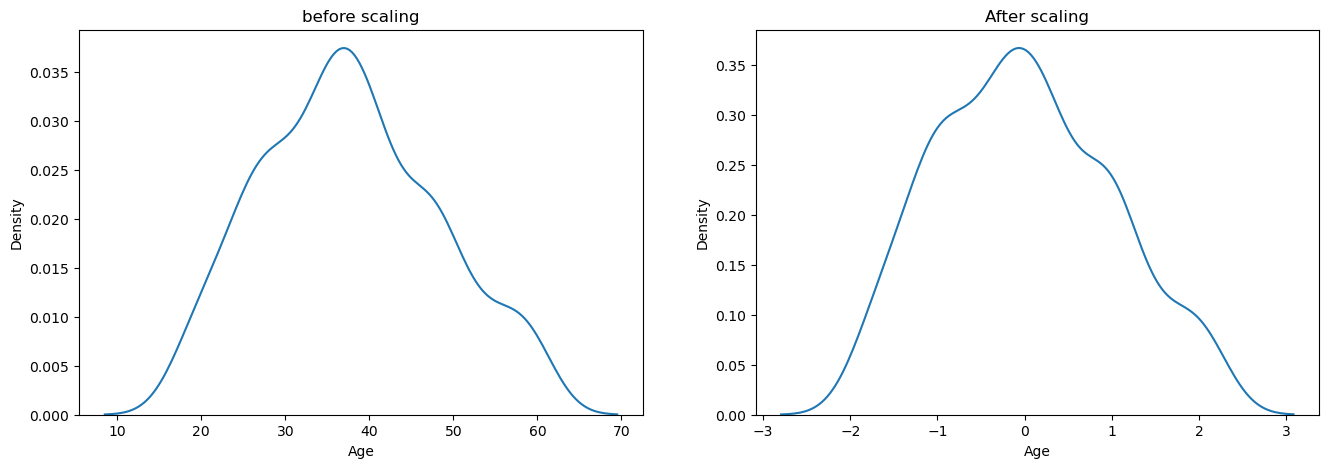

In [23]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title("before scaling")
sns.kdeplot(df['Age'])
plt.subplot(1,2,2)
plt.title("After scaling")
sns.kdeplot(X_train_scaled['Age'])
# plt.subplot(2,2,3)
# # plt.title("before scaling")
# # plt.(X_train_scaled['Age'] ,X_train_scaled['EstimatedSalary'])
# # plt.subplot(2,2,4)
# # plt.title("After scaling")
# # plt.(X_train_scaled['Age'] ,X_train_scaled['EstimatedSalary'])
# # plt.show()


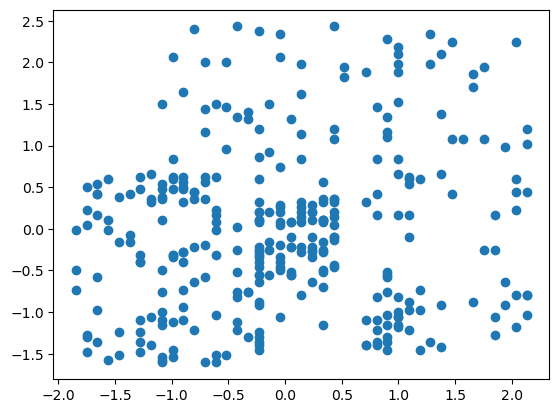

In [25]:
plt.scatter(X_train_scaled['Age'] ,X_train_scaled['EstimatedSalary'])

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
LR = LogisticRegression()

In [29]:
LR.fit(X_train_scaled , Y_train)

LogisticRegression()

In [30]:
y_pred =LR.predict(X_train_scaled)

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [33]:
acc_score = accuracy_score(y_pred , Y_train)

In [34]:
print("acc_score :" ,acc_score )

acc_score : 0.834375


In [48]:
acc_score

0.834375

In [35]:
#precision_score

In [36]:
precn_score = precision_score(y_pred , Y_train)

In [37]:
print("precn_score :" ,precn_score)

precn_score : 0.6574074074074074


In [38]:
rec_score = recall_score(y_pred ,Y_train)

In [39]:
print('rec_score :' ,rec_score)

rec_score : 0.8160919540229885


In [41]:
error_rate = 1 - acc_score

In [42]:
print("error_rate :" ,error_rate)

error_rate : 0.16562500000000002


In [43]:
conf_matrix =  confusion_matrix(y_pred , Y_train)

In [44]:
conf_matrix

array([[196,  37],
       [ 16,  71]], dtype=int64)

In [45]:
TN, FP, FN, TP = conf_matrix.ravel()

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)

True Positives (TP): 71
False Positives (FP): 37
True Negatives (TN): 196
False Negatives (FN): 16


# buidling a predictive system¶

In [66]:
input_data = (15786993, 56 , 150000)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = LR.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("the person Will not purchased")
else:
    print("person Will purchased")


[1]
person Will purchased


C:\Users\solan\anaconda1\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [49]:
df


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
